In [ ]:
!pip install pmdarima

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving aaba.us.csv to aaba.us.csv


In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('aaba.us.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [ ]:
data

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1996-04-12,1.05,1.790,1.02,1.38,408720000,0
1996-04-15,1.49,1.500,1.25,1.34,79231200,0
1996-04-16,1.34,1.340,1.17,1.20,48026400,0
1996-04-17,1.18,1.180,1.03,1.12,42871200,0
1996-04-18,1.25,1.250,1.17,1.22,27352800,0
...,...,...,...,...,...,...
2017-11-06,70.27,71.960,70.27,71.71,7129828,0
2017-11-07,72.20,72.470,71.62,72.22,9161521,0
2017-11-08,72.00,72.200,71.09,71.16,7363365,0


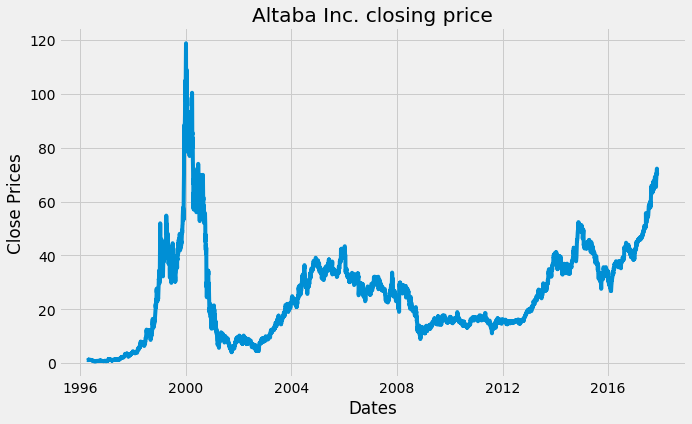

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

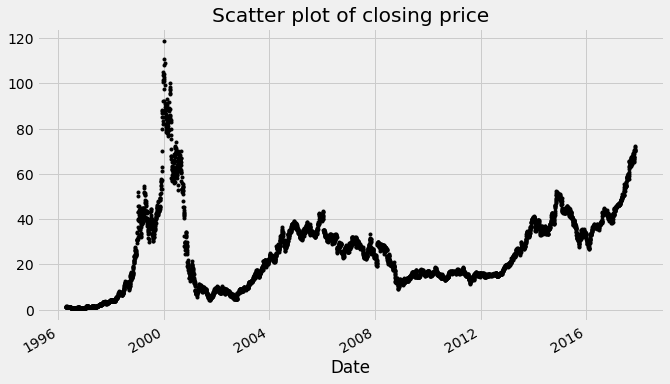

In [ ]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

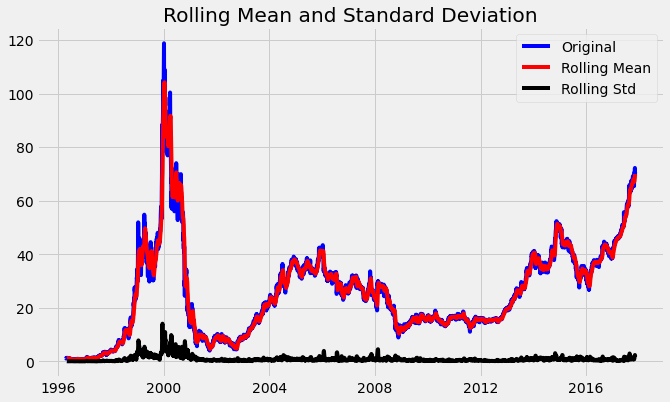

Results of dickey fuller test
Test Statistics                  -2.062280
p-value                           0.259950
No. of lags used                 32.000000
Number of observations used    5401.000000
critical value (1%)              -3.431561
critical value (5%)              -2.862075
critical value (10%)             -2.567055
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

No handles with labels found to put in legend.


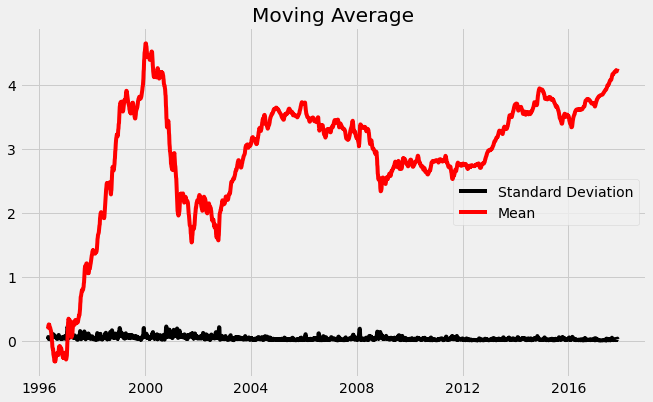

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

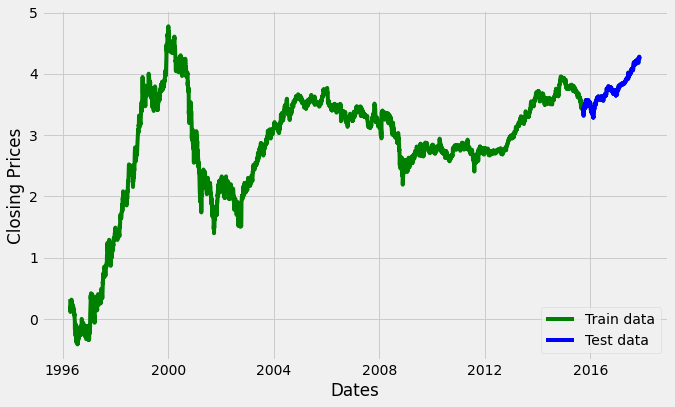

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18377.184, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18375.274, Time=1.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18375.280, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18377.513, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18378.090, Time=1.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18386.172, Time=2.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-18386.124, Time=0.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-18384.395, Time=5.96 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18384.593, Time=2.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18386.043, Time=2.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-18386.390, Time=0.77 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-18386.638, Time=1.00 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-18386.295, Time=0.76 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-18384.643, Time=1.27 sec
 ARIM

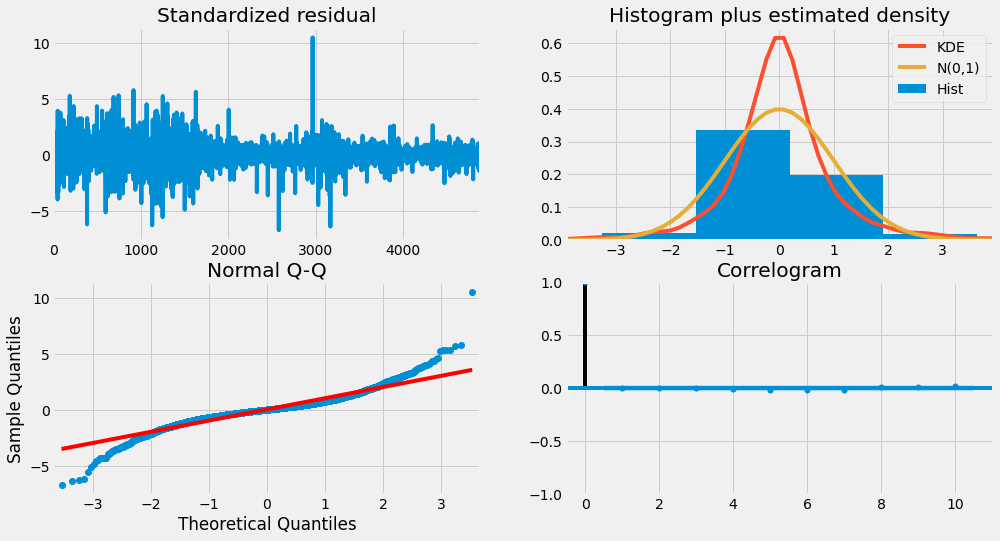

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
import statsmodels.tsa.arima.model as stats

model = stats.ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4887
Model:                 ARIMA(3, 1, 2)   Log Likelihood                9197.387
Date:                Thu, 28 Oct 2021   AIC                         -18382.774
Time:                        16:31:53   BIC                         -18343.809
Sample:                             0   HQIC                        -18369.101
                               - 4887                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1969      1.820     -0.108      0.914      -3.764       3.370
ar.L2         -0.0735      0.701     -0.105      0.916      -1.447       1.300
ar.L3          0.0122      0.090      0.135      0.8

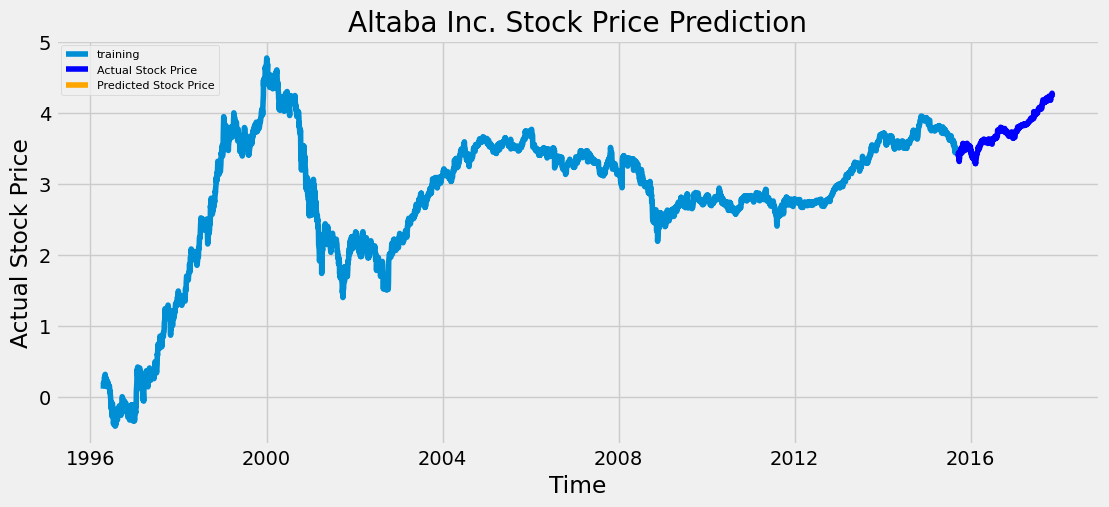

In [ ]:
# Forecast
fc = fitted.forecast(544, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(fc, index=test_data.index)
upper_series = pd.Series(fc, index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.14821600179377176
MAE: 0.3136533766099764
RMSE: 0.38498831384052656
MAPE: nan
